In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, confusion_matrix

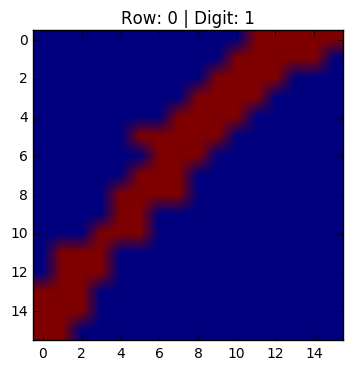

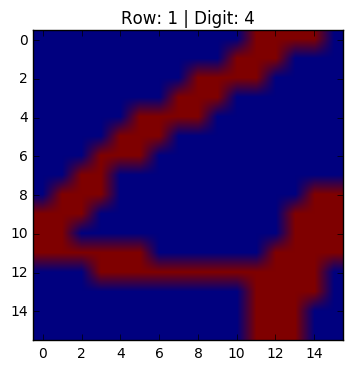

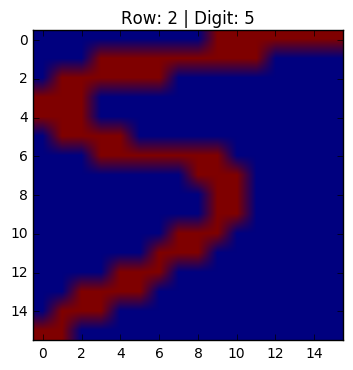

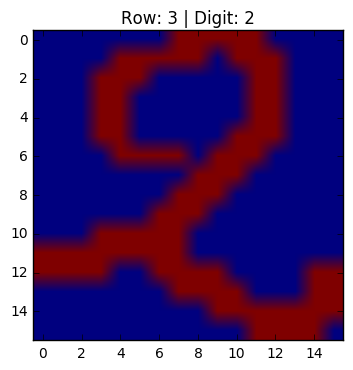

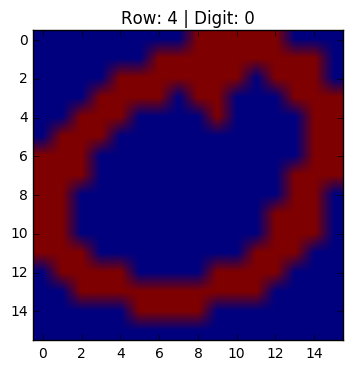

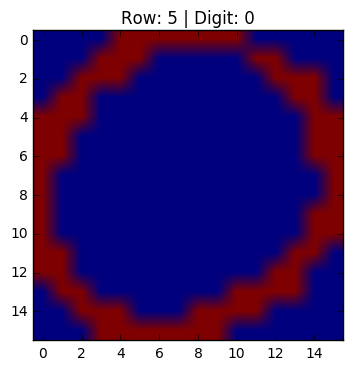

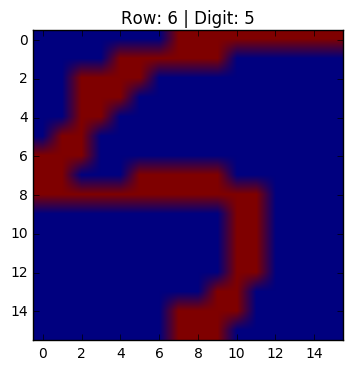

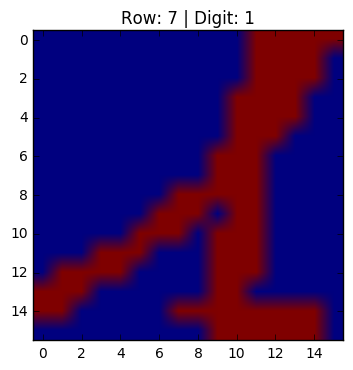

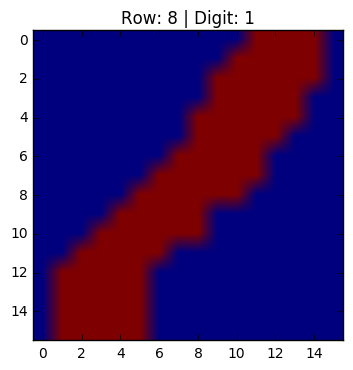

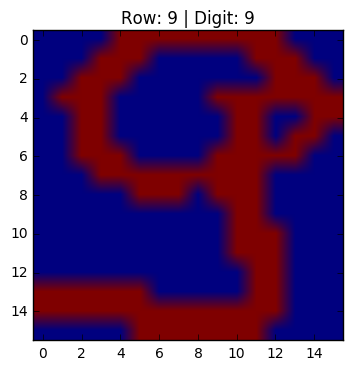

In [22]:
def split_x_y(fname):
    X, y = pd.read_csv(fname), []
    try:
        y = X['digit']
        del X['digit']
    finally:
        return X, y
        
x_train, y_train = split_x_y('digits_train.csv')
x_valid, y_valid = split_x_y('digits_valid.csv')
x_test, y_test = split_x_y('digits_test.csv')

for i in range(10):
    grid = x_train.loc[i, :].values.reshape((16, 16))
    plt.title('Row: {:d} | Digit: {:d}'.format(i, y_train.values[i]))
    plt.imshow(grid)
    plt.show()

def plot_conf_mat(matrix):
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    grid = plt.imshow(conf_mat, interpolation='nearest')
    cb = fig.colorbar(grid)
    plt.show()

Best 3-NN: f1-score = 0.879459

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  1 30  0  0  0  0  0  1  0]
 [ 0  0  1 24  0  0  0  2  0  0]
 [ 0  5  0  0 27  0  1  0  0  0]
 [ 0  1  0  0  0 37  0  0  0  0]
 [ 3  0  0  0  0  0 33  0  0  0]
 [ 0  5  0  0  0  0  0 25  0  0]
 [ 1  2  1  1  0  1  2  0 17  2]
 [ 1  0  1  3  0  3  0  0  0 21]]


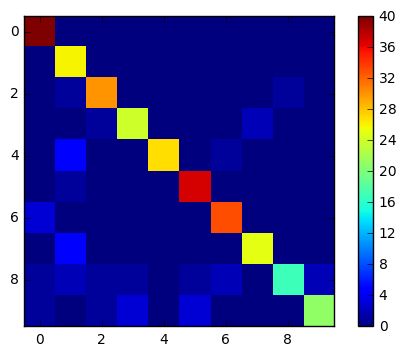

In [19]:
# Part-I:
# The classification shall suffer from separating '1' and '4', '3' and '8', and also among '0', '6', '9'.

# Part-II
# no scale needed
def eval_knn(n_nbrs, verbose=False):
    knn_clf = KNeighborsClassifier(n_neighbors=n_nbrs, weights='uniform', metric='euclidean')
    y_pred = knn_clf.fit(x_train, y_train).predict(x_valid)
    f1 = f1_score(y_true=y_valid, y_pred=y_pred, average='weighted')
    if not verbose:
        return f1
    print('Best {:d}-NN: f1-score = {:f}\n'.format(n_nbrs, f1))
    conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
    print(conf_mat)
    plot_conf_mat(conf_mat)

best_k = max(range(1, 11), key=eval_knn)
eval_knn(best_k, True)

LDA f1-score = 0.803199

[[37  0  0  0  0  0  1  0  1  1]
 [ 0 21  2  0  0  1  0  1  0  1]
 [ 0  1 25  0  0  0  2  0  3  1]
 [ 0  0  0 24  0  0  0  3  0  0]
 [ 0  7  0  0 24  0  1  0  1  0]
 [ 0  0  0  6  0 28  1  2  1  0]
 [ 1  1  0  0  0  1 31  0  2  0]
 [ 0  2  0  0  0  1  0 27  0  0]
 [ 1  2  1  0  0  0  0  2 18  3]
 [ 1  0  2  4  1  0  0  0  1 20]]


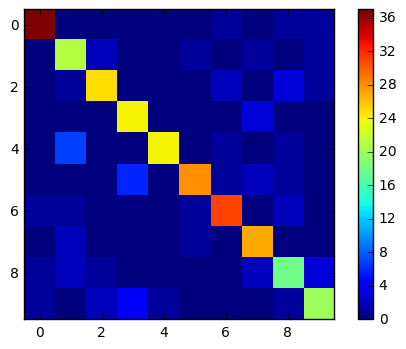

In [20]:
lda_clf = LinearDiscriminantAnalysis()
y_pred = lda_clf.fit(x_train, y_train).predict(x_valid)
f1 = f1_score(y_true=y_valid, y_pred=y_pred, average='weighted')
print('LDA f1-score = {:f}\n'.format(f1))
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
print(conf_mat)
plot_conf_mat(conf_mat)

In [ ]:
'''
Part-II Conclusions:
(1) Optimal k for k-NN classification: 3;
    Best Weighted F1-Score in kNN achieved: 0.879459;
    Best Weighted F1-Score in LDA achieved: 0.803199;
    kNN is somewhat more precise.
    
(2) See the first confusion matrix by optimized kNN;
    15% of '4' are missclassified as 1;
    16.7% of '7' are missclassified as 1;
    Classification of 8 and 9 are uniformly faulty.
    
    The train set can make our classifier more tolerant towards the similarities between '6', '9' and '0',
    but still failed to reliably separate '3' and '8', and even trapped in '1', '4' and '7'.

(3) For the following reasons: (a) The problem data set is intrinsically not multinomially separable; 
    (b) It suffers more from overfitting than probability or density based methods such as LDA.
'''

# Result combining & outporting to csv
DataFrame({'knn_pred': KNeighborsClassifier(n_neighbors=best_k).fit(x_train, y_train).predict(x_test), 
           'lda_pred': LinearDiscriminantAnalysis().fit(x_train, y_train).predict(x_test)
          }).to_csv('HW3_kd538.csv')